# Mini Project 5-2 Explore Probability Distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this Project, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [19]:
# Import relevant libraries, packages, and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [20]:
# RUN THIS CELL TO IMPORT YOUR DATA.
file_path = 'modified_c4_epa_air_quality.csv'
df = pd.read_csv(file_path)
df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [21]:
# Display first 10 rows of the data.
df.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [22]:
# Display number of rows, number of columns.
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 260
Number of columns: 8


Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

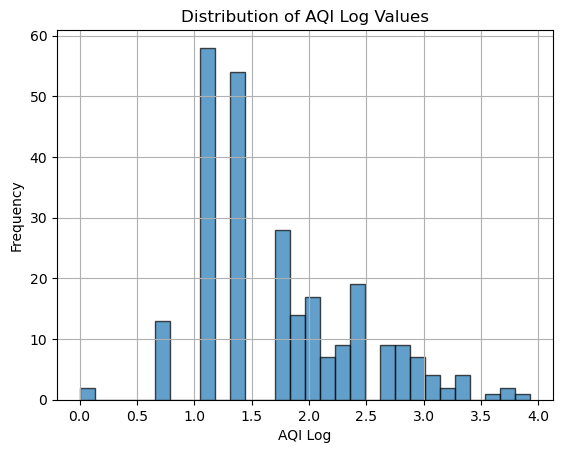

In [23]:
# Create a histogram to visualize distribution of aqi_log.
plt.hist(df['aqi_log'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of AQI Log Values')
plt.xlabel('AQI Log')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Question:** What do you observe about the shape of the distribution from the histogram? 

A: 
1. Right Skewed (Positively Skewed): The distribution appears to have a longer tail towards the right, indicating that most AQI log values are clustered on the lower end, but a few higher values extend the distribution.

2. Multimodal Distribution: There are multiple peaks in the histogram, suggesting that the data might come from different sources or distinct groups within the dataset.

3. No Perfect Normality: The shape does not resemble a typical normal (bell-shaped) distribution, indicating that the AQI log values may not follow a standard Gaussian distribution.

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [24]:
# Define variable for aqi_log mean
aqi_log_mean = df['aqi_log'].mean()

# Print out the mean
print(f"Mean of AQI Log: {aqi_log_mean:.2f}")


Mean of AQI Log: 1.77


In [25]:
# Define variable for aqi_log standard deviation
aqi_log_std = df['aqi_log'].std()

# Print out the standard deviation
print(f"Standard Deviation of AQI Log: {aqi_log_std:.2f}")

Standard Deviation of AQI Log: 0.71


Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [26]:
# Define variable for lower limit, 1 standard deviation below the mean
lower_limit = aqi_log_mean - aqi_log_std

# Define variable for upper limit, 1 standard deviation above the mean
upper_limit = aqi_log_mean + aqi_log_std

# Display lower_limit, upper_limit
print(f"Lower Limit: {lower_limit:.2f}")
print(f"Upper Limit: {upper_limit:.2f}")


Lower Limit: 1.05
Upper Limit: 2.48


In [27]:
# Compute the actual percentage of data within 1 standard deviation of the mean
within_1_std = df['aqi_log'][(df['aqi_log'] >= lower_limit) & (df['aqi_log'] <= upper_limit)].count() / len(df) * 100

# Display the actual percentage
print(f"Percentage of AQI Log values within 1 standard deviation of the mean: {within_1_std:.2f}%")

Percentage of AQI Log values within 1 standard deviation of the mean: 76.15%


Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [28]:
# Define variable for lower limit, 2 standard deviations below the mean
lower_limit_2 = aqi_log_mean - 2 * aqi_log_std

# Define variable for upper limit, 2 standard deviations above the mean
upper_limit_2 = aqi_log_mean + 2 * aqi_log_std

# Display lower_limit_2, upper_limit_2
print(f"Lower Limit (2 std): {lower_limit_2:.2f}")
print(f"Upper Limit (2 std): {upper_limit_2:.2f}")

Lower Limit (2 std): 0.34
Upper Limit (2 std): 3.20


In [29]:
# Compute the actual percentage of data within 2 standard deviations of the mean
within_2_std = df['aqi_log'][(df['aqi_log'] >= lower_limit_2) & (df['aqi_log'] <= upper_limit_2)].count() / len(df) * 100

# Display the actual percentage
print(f"Percentage of AQI Log values within 2 standard deviations of the mean: {within_2_std:.2f}%")


Percentage of AQI Log values within 2 standard deviations of the mean: 95.77%


Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [30]:
# Define variable for lower limit, 3 standard deviations below the mean
lower_limit_3 = aqi_log_mean - 3 * aqi_log_std

# Define variable for upper limit, 3 standard deviations above the mean
upper_limit_3 = aqi_log_mean + 3 * aqi_log_std

# Display lower_limit_3, upper_limit_3
print(f"Lower Limit (3 std): {lower_limit_3:.2f}")
print(f"Upper Limit (3 std): {upper_limit_3:.2f}")

Lower Limit (3 std): -0.38
Upper Limit (3 std): 3.91


In [31]:
# Compute the actual percentage of data within 3 standard deviations of the mean
within_3_std = df['aqi_log'][(df['aqi_log'] >= lower_limit_3) & (df['aqi_log'] <= upper_limit_3)].count() / len(df) * 100

# Display the actual percentage
print(f"Percentage of AQI Log values within 3 standard deviations of the mean: {within_3_std:.2f}%")

Percentage of AQI Log values within 3 standard deviations of the mean: 99.62%


## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 

A:
Within 1 standard deviation of the mean: 76.15% of the data falls within this range.
    The empirical rule predicts ≈68%, but our actual percentage is slightly higher, suggesting a more concentrated distribution around the mean.
Within 2 standard deviations of the mean: 95.77% of the data falls within this range.
    The empirical rule predicts ≈95%, and our actual percentage aligns very closely with this expectation.
Within 3 standard deviations of the mean: 99.62% of the data falls within this range.
    The empirical rule predicts ≈99.7%, and our actual percentage is also very close to this benchmark.

**Question:** How would you use z-score to find outliers? 

A: A Z-score (or standard score) measures how many standard deviations a data point is from the mean. It helps identify outliers by determining whether a value is significantly different from the rest of the dataset.

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [32]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
# Calculate Z-scores for the 'aqi_log' column
df['z_score'] = (df['aqi_log'] - aqi_log_mean) / aqi_log_std

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

# Display outliers
print("Outliers based on Z-score method:")
print(outliers[['aqi_log', 'z_score']])

# ddof=degrees of freedom correction (sample vs. population)

# Display the first 5 rows to ensure that the new column was added.
df['z_score'].head()


Outliers based on Z-score method:
      aqi_log   z_score
244  3.931826  3.029044


0    0.437265
1    0.034753
2   -0.935070
3   -0.532557
4   -0.532557
Name: z_score, dtype: float64

Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [33]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print("Outliers based on 3 standard deviations:")
print(outliers)

Outliers based on 3 standard deviations:
     date_local state_name county_name city_name local_site_name  \
244  2018-01-01    Arizona    Maricopa   Phoenix    WEST PHOENIX   

      parameter_name   units_of_measure   aqi_log   z_score  
244  Carbon monoxide  Parts per million  3.931826  3.029044  


**Question:** What do you observe about potential outliers based on the calculations?


A: Based on the Z-score calculation, only one outlier was detected, which corresponds to Carbon monoxide levels in Phoenix, Arizona, recorded on January 1, 2018. This data point has an aqi_log value of 3.93 and a Z-score of 3.03, slightly exceeding the threshold of 3 standard deviations. The presence of only one outlier suggests that most of the AQI log values follow a relatively normal distribution, with minimal extreme deviations.

**Question:** Why is outlier detection an important part of this project? 

A: Outliers can result from measurement errors, sensor malfunctions, or data entry mistakes, which could mislead analysis, and they can skew the mean and standard deviation, leading to misleading conclusions about air quality trends.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

A: I learned how to use python to work with statistical analysis, empirical rule validation, and outlier detection.

**What summary would you provide to audiences? Consider the distribution of the data and which sites would benefit from additional research.**


A: The distribution of AQI log values follows an approximately normal shape, as confirmed by the Empirical Rule (68-95-99.7%). Outliers were identified using Z-score analysis (beyond 3 standard deviations), with one notable case in Phoenix, Arizona, where carbon monoxide levels were unusually high. Sites showing higher standard deviation in AQI values should be monitored to identify possible pollution sources.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 